In [4]:
# wszystkie wymagane importy
import pandas as pd
from collections import Counter
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Wczytanie danych oraz ustawienie wyświetlania wszytskich kolumn i wierszy
path = "data/test/LDAP.csv"
dataframe = pd.read_csv(path, low_memory=False)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)


In [6]:
# Wyświetlenie pierwszych X wierszy
dataframe.head(3)

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,Label
0,13605,172.16.0.5-192.168.50.4-870-2908-17,172.16.0.5,870,192.168.50.4,2908,17,2018-11-03 10:09:00.565557,1,2,0,422.0,0.0,211.0,211.0,211.0,0.0,0.0,0.0,0.0,0.0,4.220000e+08,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-2,0,2.000000e+06,0.0,211.0,211.0,211.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,316.5,211.0,0.0,-2,0,0,0,0,0,0,2,422,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
1,62631,172.16.0.5-192.168.50.4-871-53796-17,172.16.0.5,871,192.168.50.4,53796,17,2018-11-03 10:09:00.565559,48,2,0,530.0,0.0,265.0,265.0,265.0,0.0,0.0,0.0,0.0,0.0,1.104167e+07,4.166667e+04,48.0,0.0,48.0,48.0,48.0,48.0,0.0,48.0,48.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-2,0,4.166667e+04,0.0,265.0,265.0,265.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,397.5,265.0,0.0,-2,0,0,0,0,0,0,2,530,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS
2,143869,172.16.0.5-192.168.50.4-648-40660-17,172.16.0.5,648,192.168.50.4,40660,17,2018-11-03 10:09:00.565608,1,2,0,458.0,0.0,229.0,229.0,229.0,0.0,0.0,0.0,0.0,0.0,4.580000e+08,2.000000e+06,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,-2,0,2.000000e+06,0.0,229.0,229.0,229.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,343.5,229.0,0.0,-2,0,0,0,0,0,0,2,458,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,NetBIOS


In [7]:
# Sprawdzenie liczebności próbek w klasach ruchu łagodnego oraz atakującego DDoS
print(sorted(Counter(dataframe[" Label"]).items()))

[('BENIGN', 5124), ('LDAP', 1905191), ('NetBIOS', 202919)]


In [8]:
# Rozmiar zbioru danych
dataframe.shape

(2113234, 88)

In [9]:
# Usunięcie niezanczących kolumn (w tym tekstowych) oraz usunięcie kolum, w których występują tylko wartości 0
dataframe = dataframe.drop(dataframe.columns[0], axis=1)
dataframe = dataframe.drop(columns=[' Source IP'])
dataframe = dataframe.drop(columns=[' Destination IP'])
dataframe = dataframe.drop(columns=['Flow ID'])
dataframe = dataframe.drop(columns=[' Timestamp'])
dataframe = dataframe.drop(columns=['SimillarHTTP'])
dataframe = dataframe.loc[:, dataframe.nunique() > 1]

In [10]:
# Zamienie wartości kolumnu Label na wartości liczbowe 0 - BENIGN, 1 - LDAP, 2 - NetBIOS
label_encoder = LabelEncoder()
dataframe[' Label'] = label_encoder.fit_transform(dataframe[' Label'])

In [11]:
# Sprawdzenie, czy są brakujące wartości
print(dataframe.isna().sum())

 Source Port                     0
 Destination Port                0
 Protocol                        0
 Flow Duration                   0
 Total Fwd Packets               0
 Total Backward Packets          0
Total Length of Fwd Packets      0
 Total Length of Bwd Packets     0
 Fwd Packet Length Max           0
 Fwd Packet Length Min           0
 Fwd Packet Length Mean          0
 Fwd Packet Length Std           0
Bwd Packet Length Max            0
 Bwd Packet Length Min           0
 Bwd Packet Length Mean          0
 Bwd Packet Length Std           0
Flow Bytes/s                    13
 Flow Packets/s                  0
 Flow IAT Mean                   0
 Flow IAT Std                    0
 Flow IAT Max                    0
 Flow IAT Min                    0
Fwd IAT Total                    0
 Fwd IAT Mean                    0
 Fwd IAT Std                     0
 Fwd IAT Max                     0
 Fwd IAT Min                     0
Bwd IAT Total                    0
 Bwd IAT Mean       

In [12]:
# Wypełnianie brakujących wartości średnią
dataframe = dataframe.fillna(dataframe.mean())  # Wypełnianie brakujących wartości średnią

In [13]:
# Sprawdzenie obecności wartości inf i -inf w danych
print(np.isinf(dataframe).sum())

 Source Port                        0
 Destination Port                   0
 Protocol                           0
 Flow Duration                      0
 Total Fwd Packets                  0
 Total Backward Packets             0
Total Length of Fwd Packets         0
 Total Length of Bwd Packets        0
 Fwd Packet Length Max              0
 Fwd Packet Length Min              0
 Fwd Packet Length Mean             0
 Fwd Packet Length Std              0
Bwd Packet Length Max               0
 Bwd Packet Length Min              0
 Bwd Packet Length Mean             0
 Bwd Packet Length Std              0
Flow Bytes/s                    54112
 Flow Packets/s                 54112
 Flow IAT Mean                      0
 Flow IAT Std                       0
 Flow IAT Max                       0
 Flow IAT Min                       0
Fwd IAT Total                       0
 Fwd IAT Mean                       0
 Fwd IAT Std                        0
 Fwd IAT Max                        0
 Fwd IAT Min

In [14]:
# Zastąpienie wartości inf lub -inf np. średnią danej kolumny
dataframe = dataframe.replace([np.inf, -np.inf], np.nan)
dataframe = dataframe.fillna(dataframe.mean()) 

In [15]:
# Sprawdzenie typów poszczególnych kolumn przed liczeniem korelacji (powinny mieć wartości liczbowe)
dataframe.dtypes

 Source Port                      int64
 Destination Port                 int64
 Protocol                         int64
 Flow Duration                    int64
 Total Fwd Packets                int64
 Total Backward Packets           int64
Total Length of Fwd Packets     float64
 Total Length of Bwd Packets    float64
 Fwd Packet Length Max          float64
 Fwd Packet Length Min          float64
 Fwd Packet Length Mean         float64
 Fwd Packet Length Std          float64
Bwd Packet Length Max           float64
 Bwd Packet Length Min          float64
 Bwd Packet Length Mean         float64
 Bwd Packet Length Std          float64
Flow Bytes/s                    float64
 Flow Packets/s                 float64
 Flow IAT Mean                  float64
 Flow IAT Std                   float64
 Flow IAT Max                   float64
 Flow IAT Min                   float64
Fwd IAT Total                   float64
 Fwd IAT Mean                   float64
 Fwd IAT Std                    float64


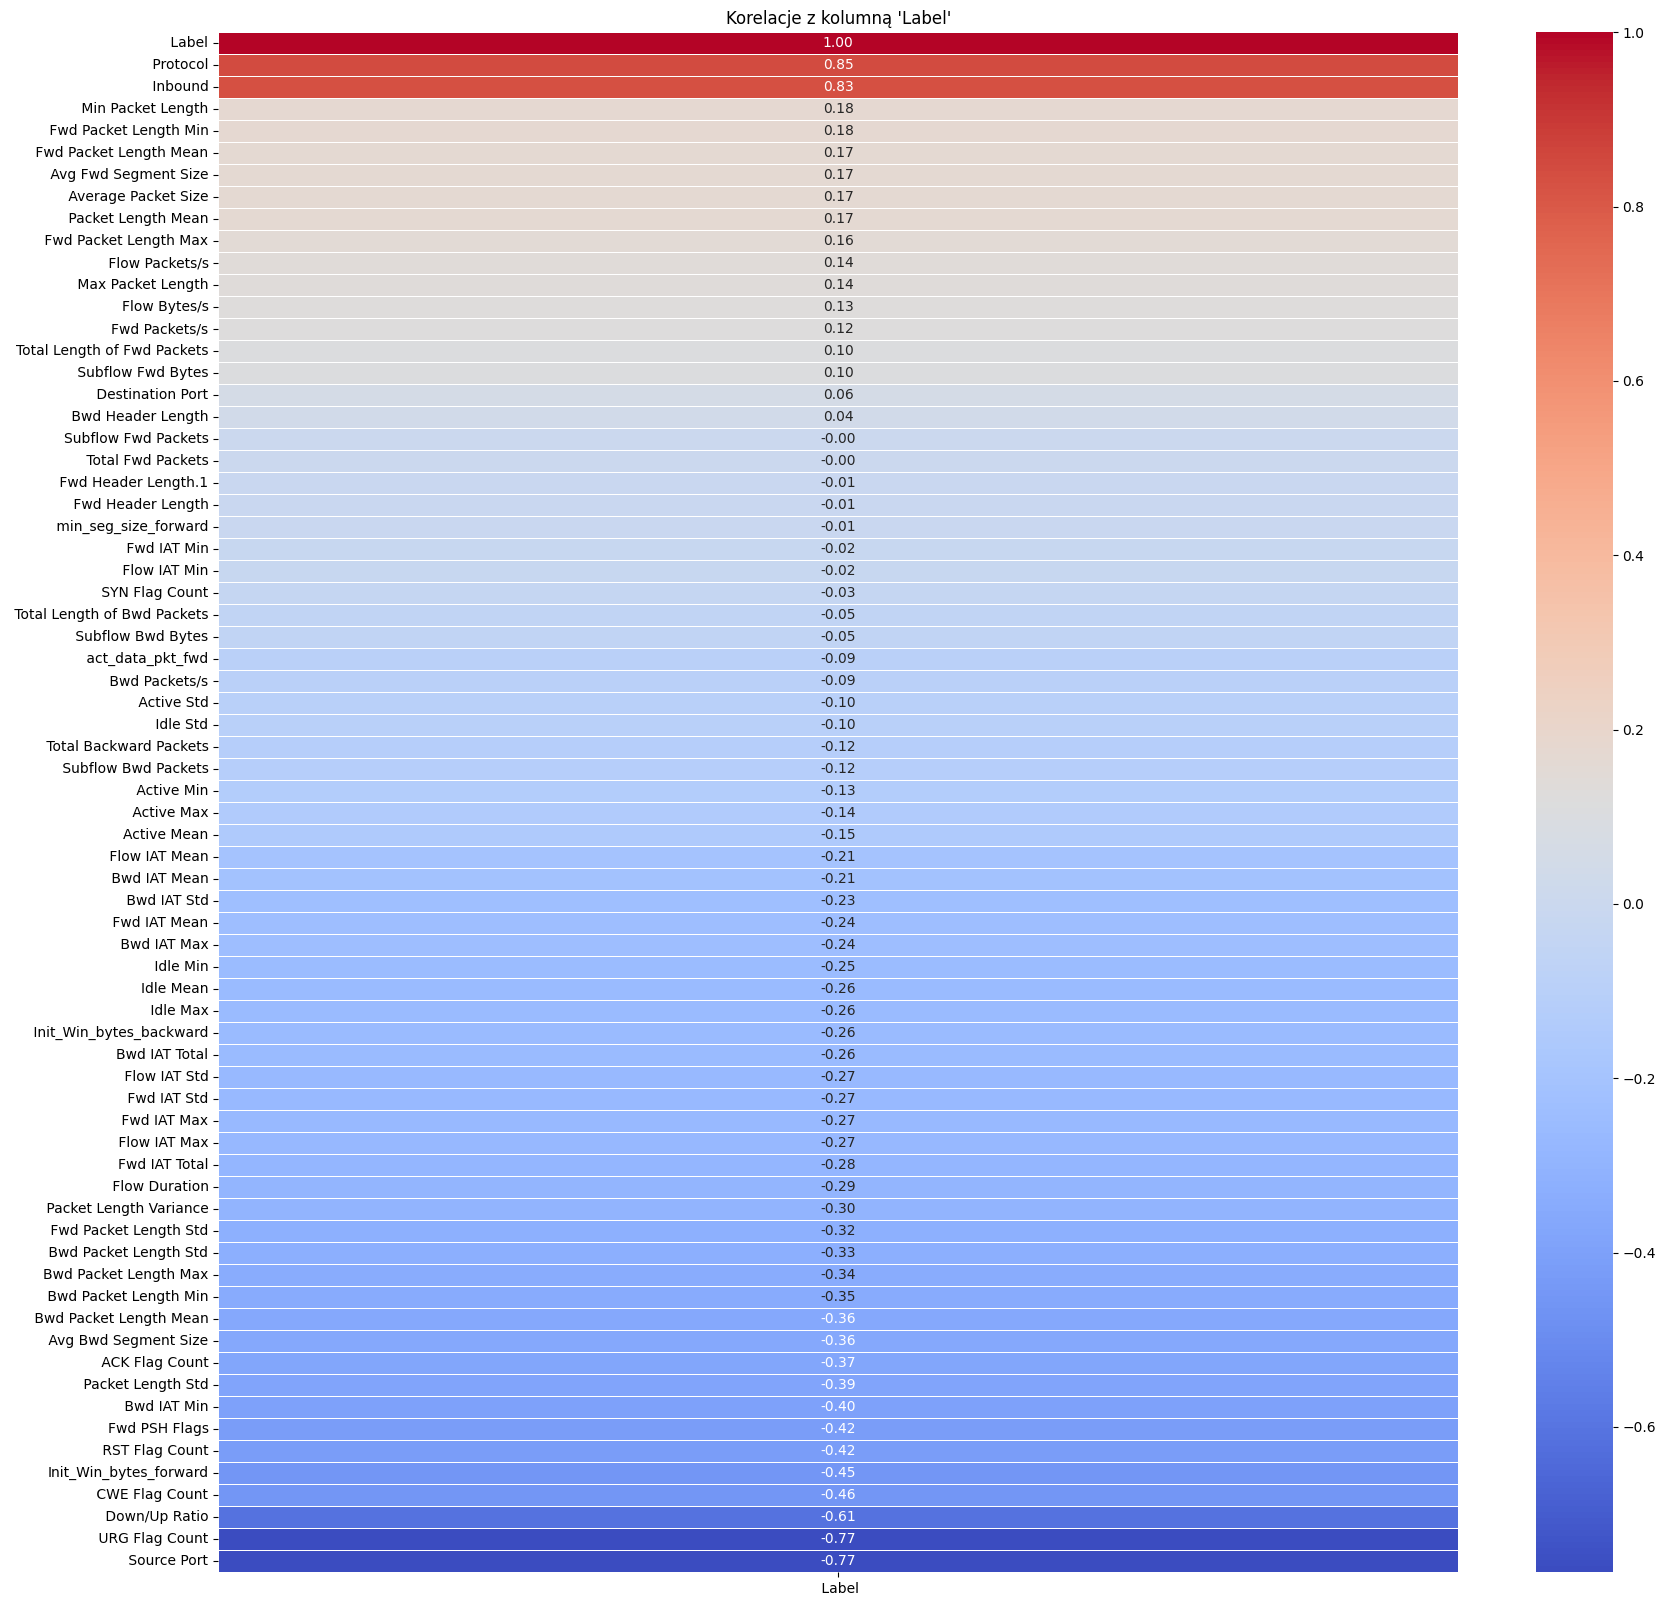

In [16]:
# Przekształcenie kolumny Label: 0 to Benign, 1 i 2 to DDoS attack
dataframe[' Label'] = dataframe[' Label'].apply(lambda x: 0 if x == 0 else 1)

# Obliczanie korelacji
correlation_with_binary_label = dataframe.corr()[' Label'].sort_values(ascending=False)

# Tworzenie heatmapy
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_with_binary_label.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Korelacje z kolumną 'Label'")
plt.show()


In [17]:
# Usunięcie kolumny Inbound oraz Protocol, ponieważ są cechami o dużej korelacji, ale tak naprawdę mają negatywny wpływ na podjęcie decyzji
# Każdy atak jest z poza sieci czyli Inbound
# Użytkownicy mogą kożystać z każdego protokołu
dataframe = dataframe.drop(columns=[' Inbound'])
dataframe = dataframe.drop(columns=[' Protocol'])

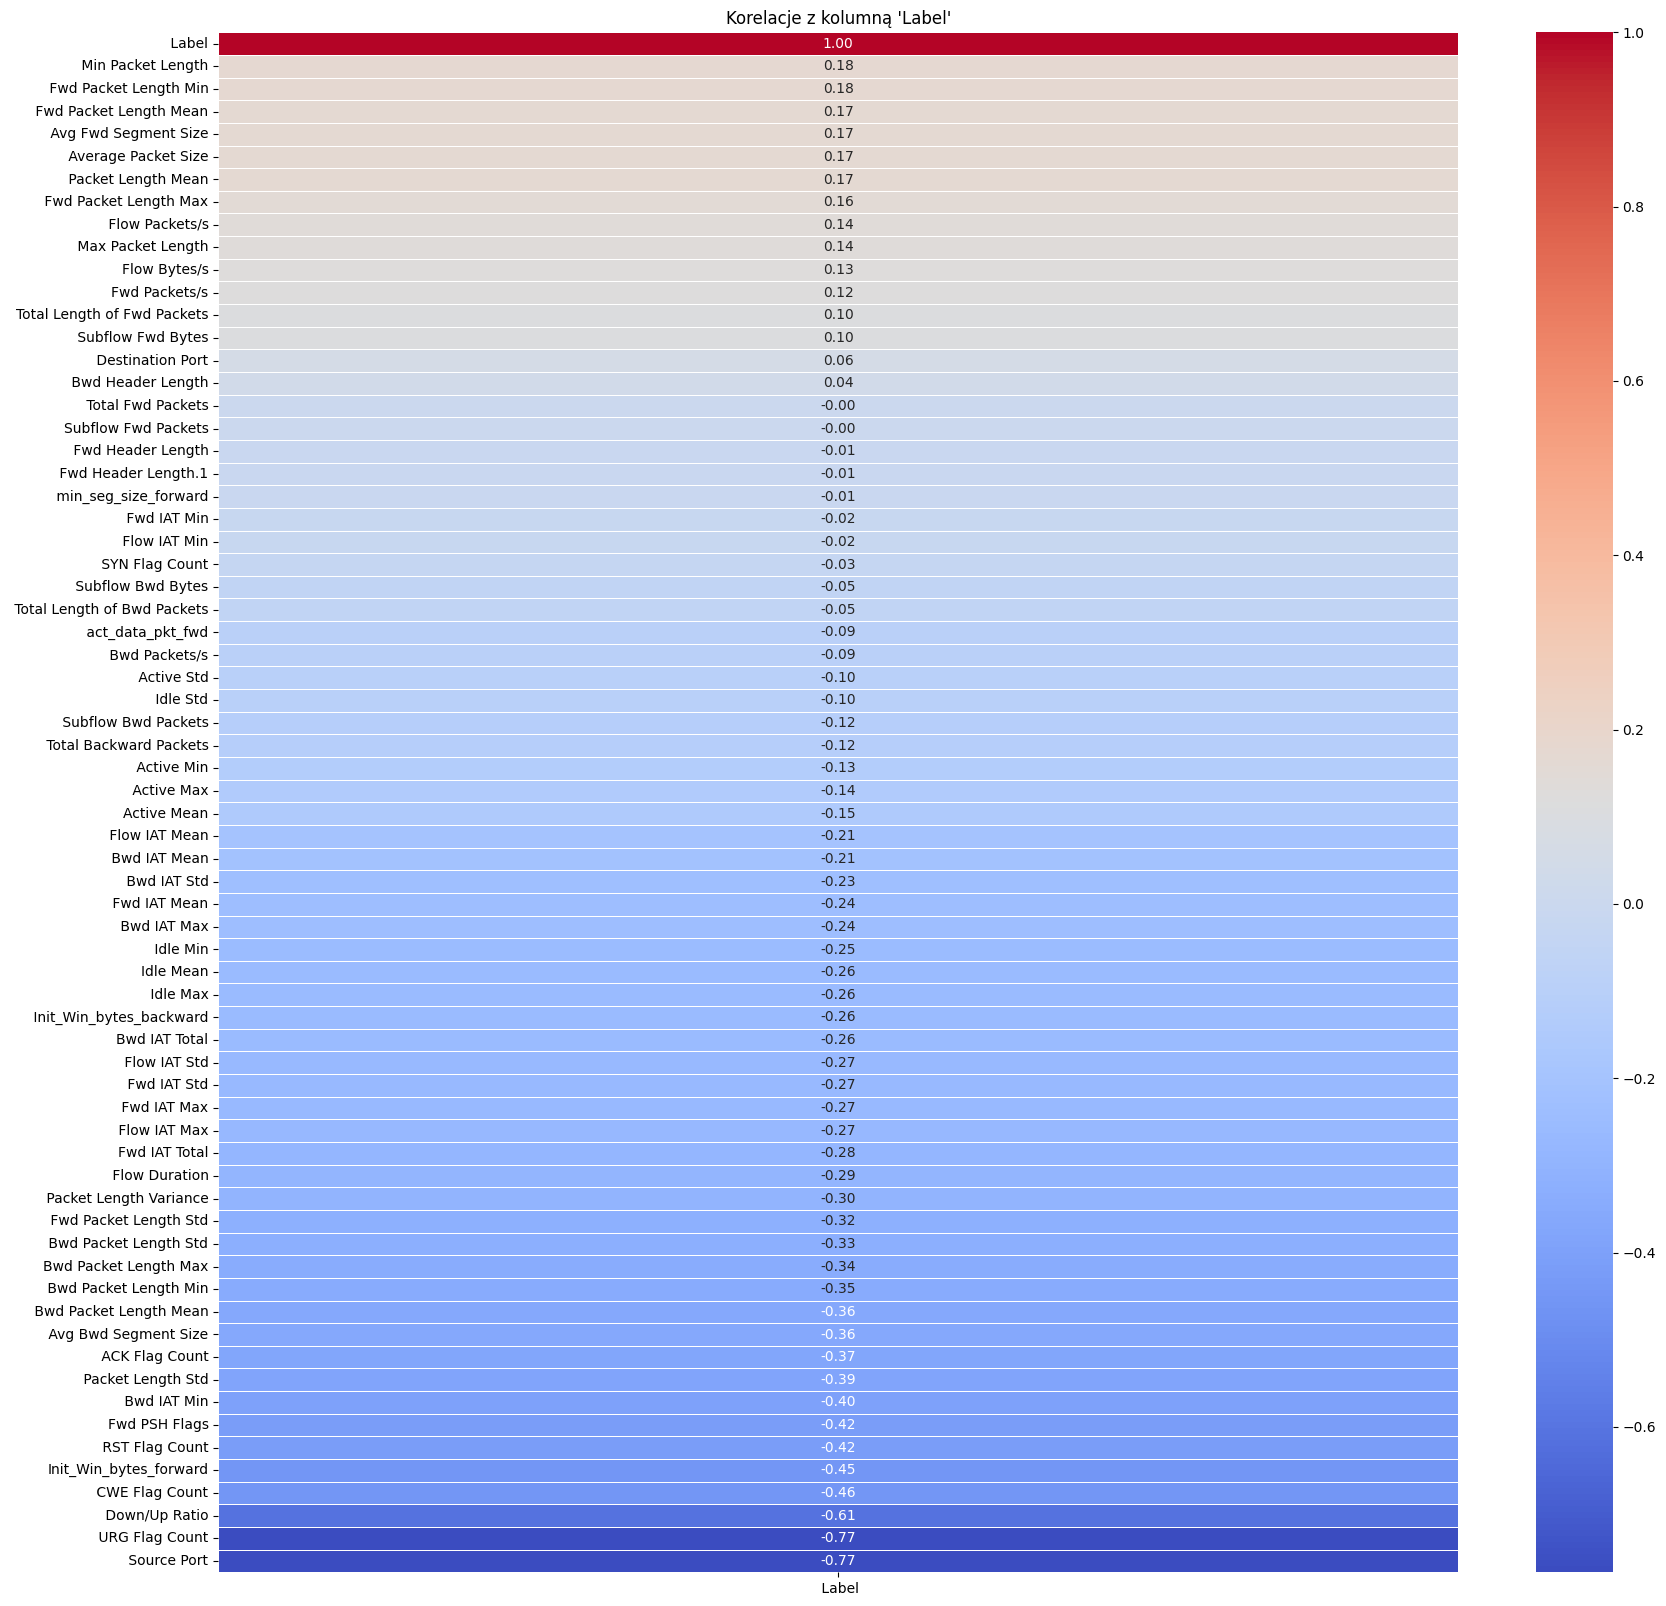

In [18]:
# Obliczenie korelacji po usunięciu odpowiednich kolumn
correlation_with_binary_label = dataframe.corr()[' Label'].sort_values(ascending=False)

# Tworzenie heatmapy
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_with_binary_label.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Korelacje z kolumną 'Label'")
plt.show()

In [19]:
# Z heatmapy możemy odczytać, że cechami (15), które mają wpływ na klasyfikację ruchu to:
# Min Packet Length
# Fwd Packet Length Min
# Fwd Packet Length Mean
# Avg Fwd Segment Size
# Average Packet Size
# Packet Length Mean
# Fwd Packet Length Max
# Flow Packets/s
# Max Packet Length
# Flow Bytes/s
# Fwd Packets/s
# Total Length of Fwd Packets
# Subflow Fwd Bytes
# Destination Port
# Bwd Header Length

# Dalsza część projektu zanjduje się w pliku v1_unbalanced_data_set.ipynb